Load and Prepare Data

In [47]:
import pandas as pd
df=pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [48]:
df.shape

(3479, 8)

In [49]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

Data Cleaning & missing values

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


Discover Missing values

In [51]:
'''df["Area"] = df["Area"].str.replace(',', '',regex=True).astype(int) '''

'df["Area"] = df["Area"].str.replace(\',\', \'\',regex=True).astype(int) '

In [52]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [53]:
df.isnull().sum()

Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

Remove Missing values

In [54]:
df.dropna(inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB


Checking Duplicates Dataset

In [56]:
print(f'Number of Duplicated in our datase is : {df.duplicated().sum()}')
print(f'The percentage of Duplicated in our dataset is : {round(df.duplicated().sum() * 100 / len(df),1)}')

Number of Duplicated in our datase is : 208
The percentage of Duplicated in our dataset is : 6.0


In [57]:
'''df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head()'''

"df.drop_duplicates(inplace=True)\ndf.reset_index(inplace=True)\ndf.drop('index',axis=1,inplace=True)\ndf.head()"

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB


Feature Engineering

Change the type of Area

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3450.0,1.069174e+02,6.955098e+01,30.0,6.900000e+01,9.000000e+01,1.200000e+02,9.290000e+02
Room,3450.0,2.081159e+00,7.602161e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
Price,3450.0,5.375563e+09,8.125918e+09,3600000.0,1.419250e+09,2.900000e+09,6.000000e+09,9.240000e+10
Price(USD),3450.0,1.791854e+05,2.708639e+05,120.0,4.730833e+04,9.666667e+04,2.000000e+05,3.080000e+06


In [61]:
df.drop(columns='Price(USD)',inplace=True)

In [62]:
df['price_per_meter']=df['Price']/df['Area']

Visualization 

checking feature
    
    Histogram Plots (Area, Price, price_per_meter)

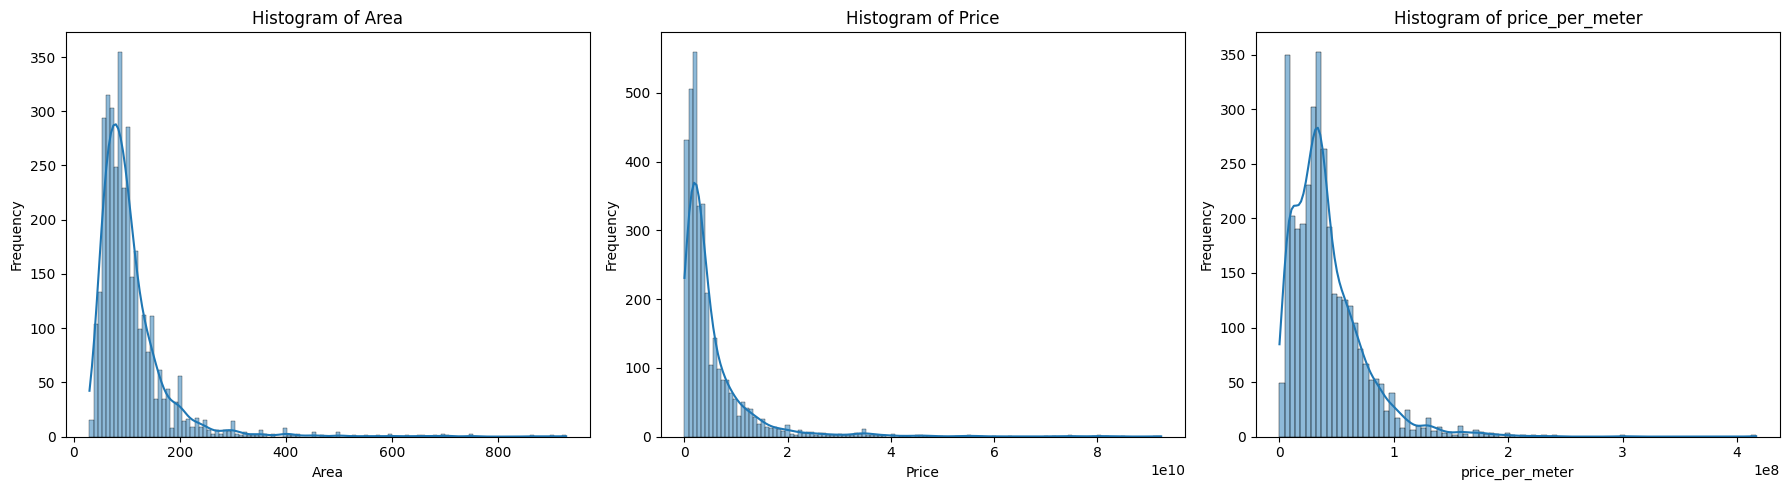

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Area', 'Price', 'price_per_meter']

plt.figure(figsize=(18, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)  
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Description

    1. As it can be seen , (Price & price_per_meter) feature is Right-Skewed.
    2.Outliers in  (Area & price & price_per_meter) are obvious now(on the right side)
 

Count Plots (Room, Parking, Warehouse, Elevator)

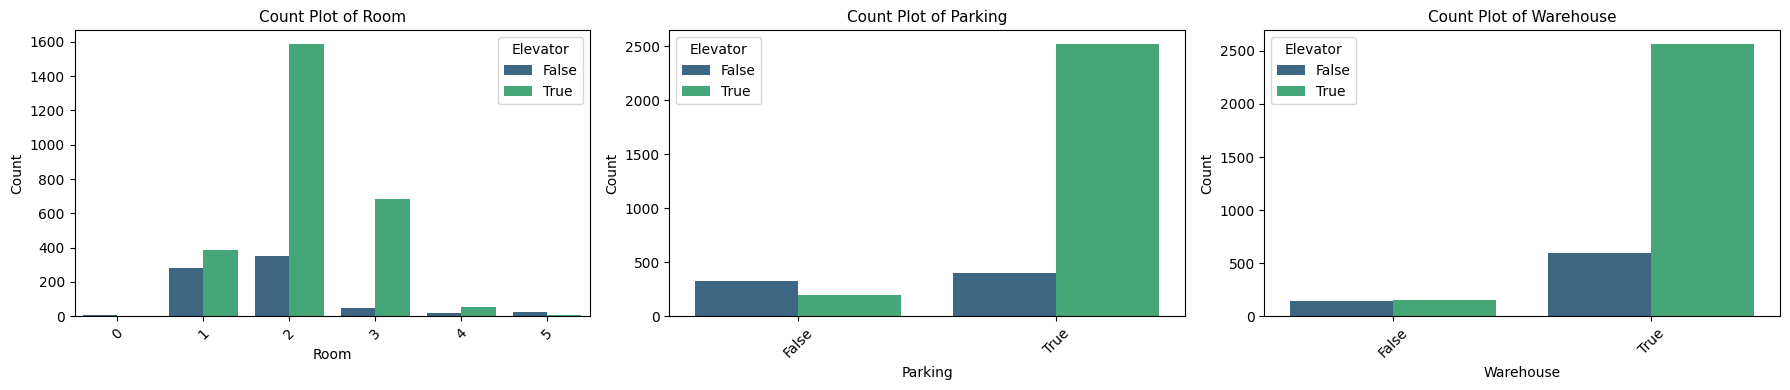

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Room', 'Parking', 'Warehouse']

plt.figure(figsize=(18, 4))

for i, col in enumerate(features, 1):
    if col in df.columns:
        plt.subplot(1, 3, i)
        sns.countplot(data=df, x=col,hue='Elevator' ,palette='viridis')
        plt.title(f'Count Plot of {col}', fontsize=11)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Description

    1.About 2000 houses have exactly 2 rooms (most houses)
    2.Distribution of 1 and 3 rooms are roughly the same (a little more 3 rooms)
    3.we have not many houses with 4 or 5 rooms (in total about 150 houses)
    4.houses without room is rarely seen
    5.Most houses have Parking , Warehouse and Elevator (all these three features )
    6.Most houses have Warehouse and Elevator.(houses without Warehouse and Elevator are very low)

Conclusion

    1.Mean of rooms is roughly 2.
    2.Most houses have Parking , Warehouse and Elevator (all these three features )

Boxplots (Area, Price, price_per_meter)

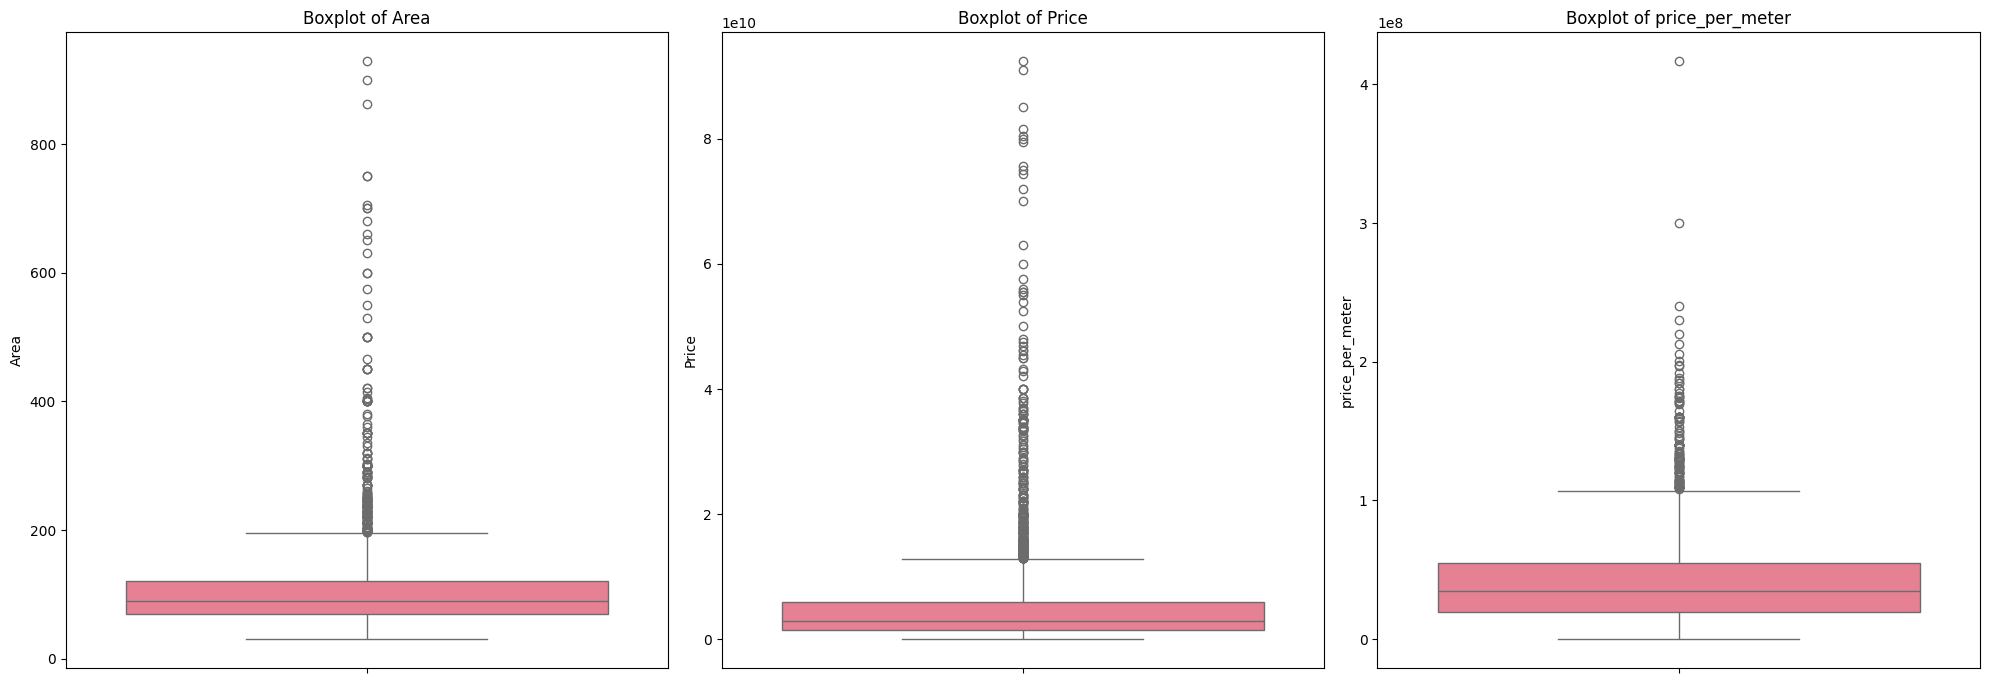

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
features = df[['Area', 'Price','price_per_meter']]
# Define color palette
palette = sns.color_palette("husl",len(features))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(features, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Description

    Outliers in (Area & price & price_per_meter) are obvious now

Barplot – Top 10 Most Expensive Combinations (Address, Room, Parking)

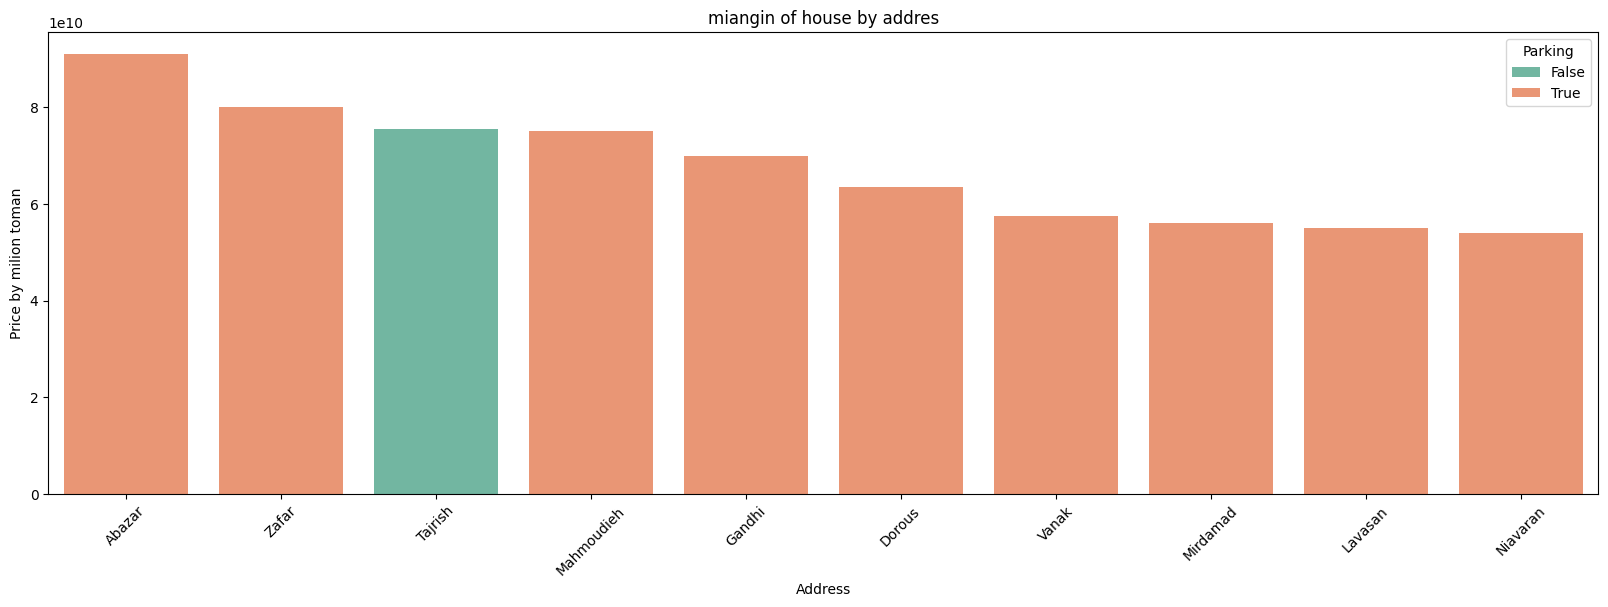

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

top_mean_house=df.groupby(['Address','Room','Parking'])['Price'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(20,6))
sns.barplot(x='Address', y='Price',hue='Parking',data=top_mean_house,palette="Set2")
plt.title('miangin of house by addres')
plt.ylabel('Price by milion toman')
plt.xlabel('Address')
plt.xticks(rotation=45)
plt.show()

Description

    Displays the top 10 address-room-parking combinations with the highest average house prices.

In [67]:
round(df.groupby(["Room" , "Warehouse","Parking"])["Price"].mean().to_frame())

Price
Room Warehouse Parking              
0    False     False    1.532960e+10
     True      False    5.033333e+08
               True     2.235000e+08
1    False     False    1.292294e+09
               True     1.531812e+09
     True      False    1.068886e+09
               True     2.071942e+09
2    False     False    1.308785e+09
               True     2.476455e+09
     True      False    1.566477e+09
               True     3.625979e+09
3    False     False    7.985731e+09
               True     6.324375e+09
     True      False    2.230000e+09
               True     1.120205e+10
4    False     False    6.200000e+09
               True     2.410000e+09
     True      True     2.658213e+10
5    False     False    9.999000e+09
               True     9.750000e+09
     True      True     4.014385e+10

In [68]:
'''df[['Parking', 'Warehouse', 'Elevator']] = df[['Parking', 'Warehouse', 'Elevator']].astype(int)'''

"df[['Parking', 'Warehouse', 'Elevator']] = df[['Parking', 'Warehouse', 'Elevator']].astype(int)"

Correlation Heatmap (Before Removing Outliers)

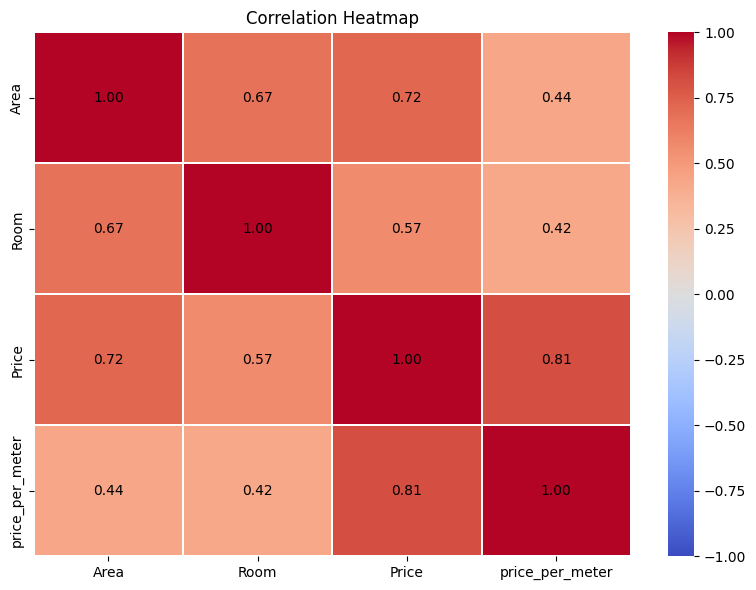

In [69]:

numericalcolumns=df.select_dtypes(include=['int64', 'float64'])
# Correlation Heatmap - ensure at least 2 numeric columns are available
if numericalcolumns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numericalcolumns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')



Description

    Shows the correlation between numeric features to identify potential relationships.

Outlier Removal

In [70]:
df_no_outliers = df.copy()
numerical_cols = df[['Area','Price','price_per_meter']]

bounds = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)


for col, (low, high) in bounds.items():
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= low) & (df_no_outliers[col] <= high)]

print(f"Rows before: {len(df)}")
print(f"Rows after removing outliers: {len(df_no_outliers)}")


Rows before: 3450
Rows after removing outliers: 3081


Boxplots (After Removing Outliers)

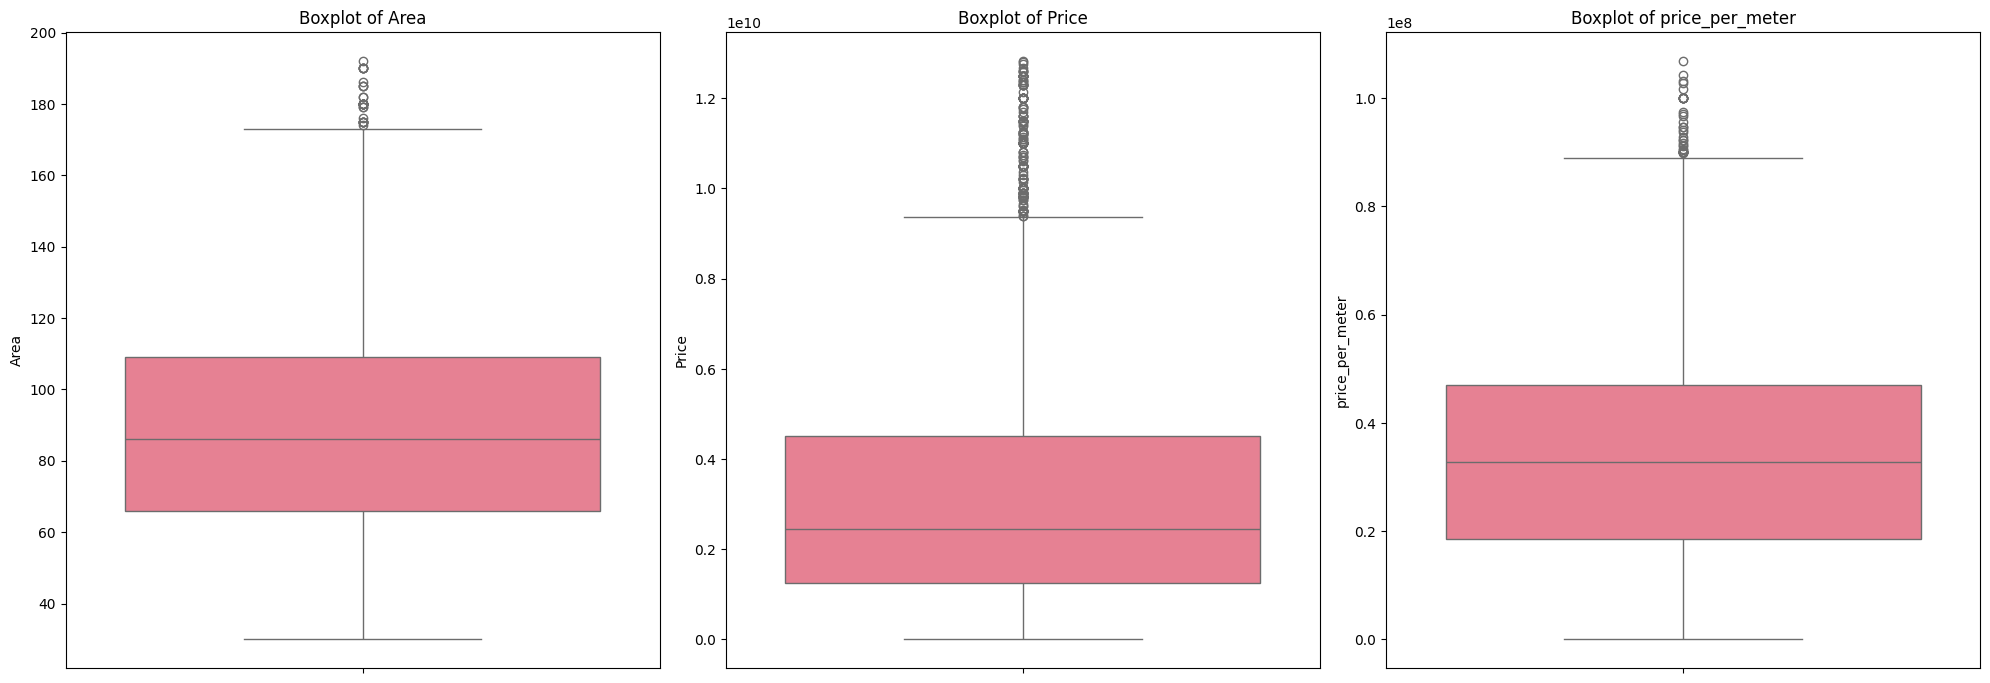

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df_no_outliers[['Area', 'Price','price_per_meter']]
# Define color palette
palette = sns.color_palette("husl",len(features))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(features, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df_no_outliers[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Description

    Now we have more balanced data and its ready to be used for fitting and realistic for analysis.
    Due to we have dropped lots of data from dataset we can use of both(with outliers and without) to check the accuracy for each one .

Correlation Heatmap (After Removing Outliers)

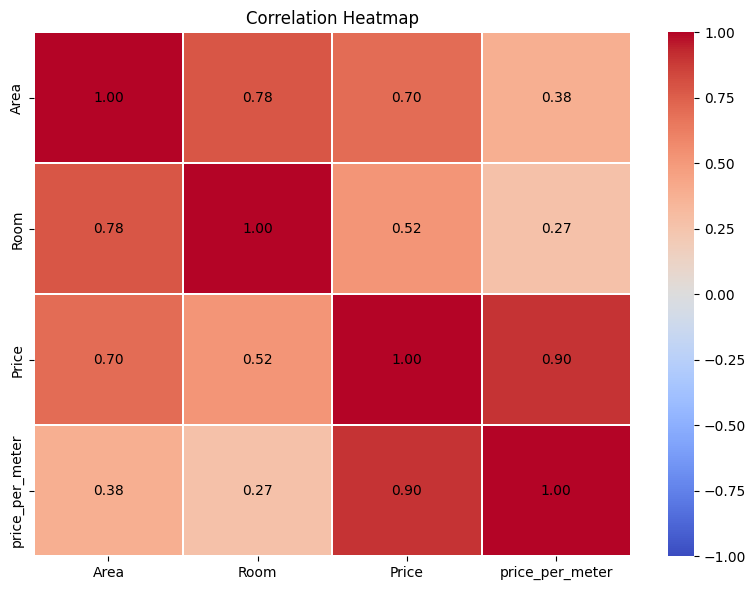

In [72]:

numericalcolumns=df_no_outliers.select_dtypes(include=['int64', 'float64'])
# Correlation Heatmap - ensure at least 2 numeric columns are available
if numericalcolumns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numericalcolumns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')



Description

    Updated correlations after outlier removal, showing more stable relationships between features.

Scatter Plot (Area vs Price per meter)

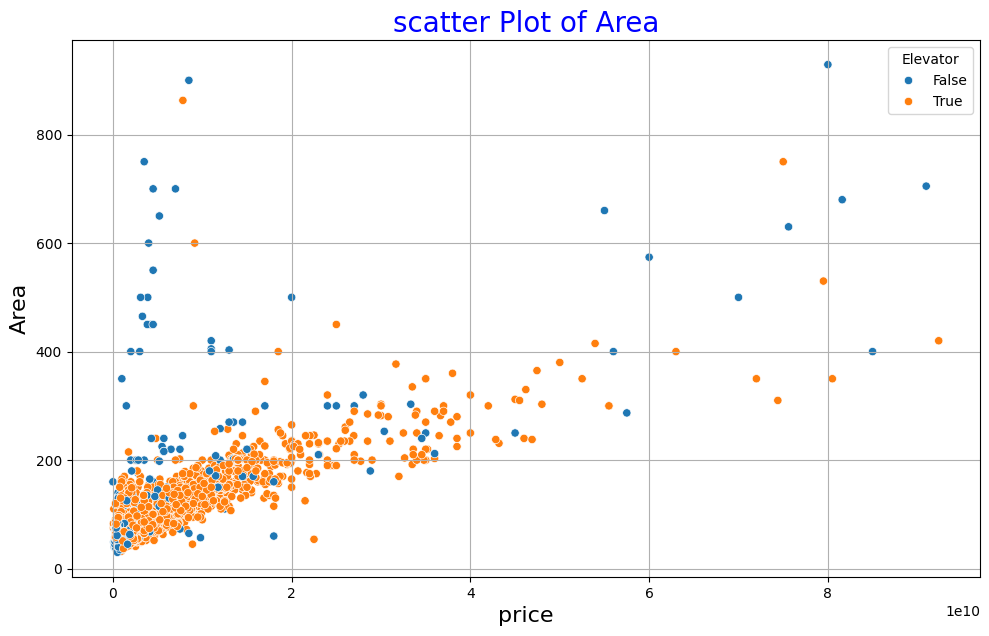

In [73]:

features = ['Area']

plt.figure(figsize=(10,30))
for idx, column in enumerate(features):
    plt.subplot(5, 1,  idx + 1)
    sns.scatterplot(x = df['Price'], y=df[column],hue='Elevator' , data = df, color='darkblue')
    plt.title(f'scatter Plot of {column}', color='blue', fontsize=20)
    plt.xlabel('price', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

Description


    Displays the relationship between property area and price per meter

Barplot (Room vs Area, Price, price_per_meter)

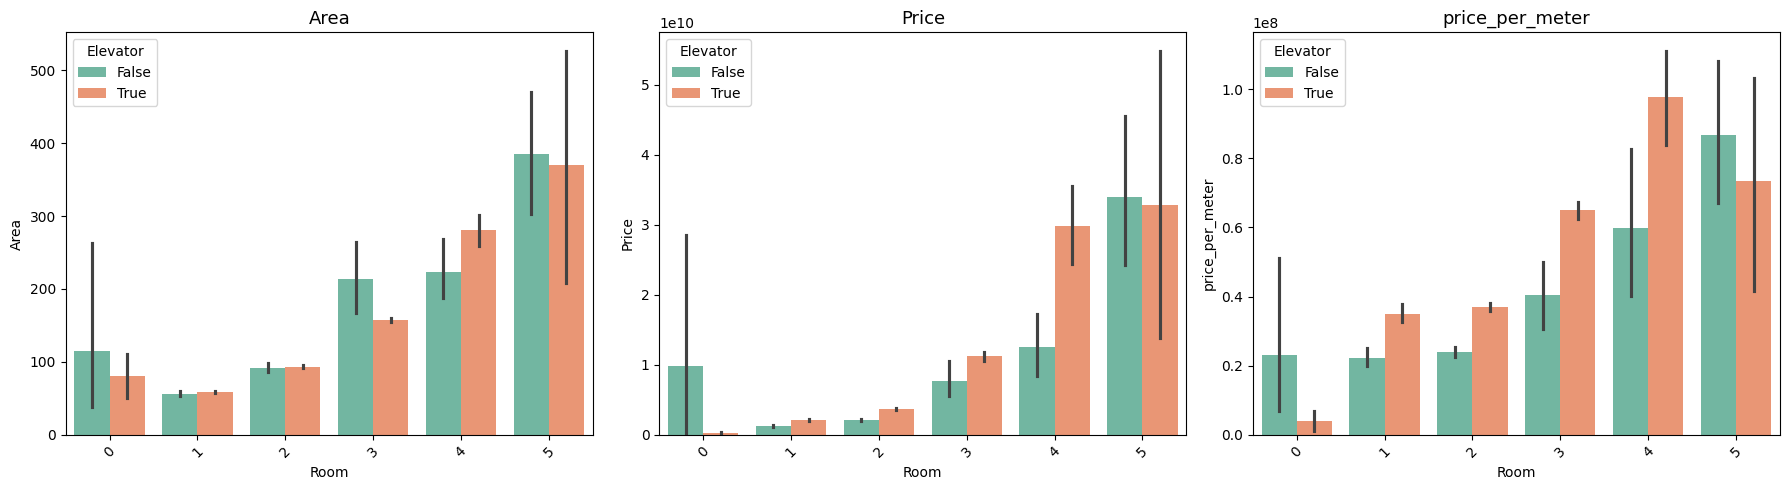

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical = ['Area', 'Price', 'price_per_meter']

plt.figure(figsize=(18, 5)) 

for i, col in enumerate(categorical, 1):  
    plt.subplot(1, len(categorical), i)   
    sns.barplot(x='Room', y=col,hue='Elevator', data=df, palette="Set2")
    plt.title(f'{col}', fontsize=13)
    plt.xlabel('Room')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Description


    Shows how average Area, Price, and Price per meter change with the number of rooms.
    More rooms generally lead to higher total price but not always higher price per meter.

Encoding Address

In [75]:
from sklearn.preprocessing import LabelEncoder
features_to_encode = ['Parking', 'Warehouse', 'Elevator', 'Address']

le = LabelEncoder()
for col in features_to_encode:
    df[col] = le.fit_transform(df[col])
df.sample(5)

'''
address_dummy=pd.get_dummies(df['Address'])
df_no_outliers=df.merge(address_dummy,left_index=True,right_index=True)
df_no_outliers.drop(columns='Address',inplace=True)
df_no_outliers.head()'''

"\naddress_dummy=pd.get_dummies(df['Address'])\ndf_no_outliers=df.merge(address_dummy,left_index=True,right_index=True)\ndf_no_outliers.drop(columns='Address',inplace=True)\ndf_no_outliers.head()"

In [76]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,price_per_meter
0,63.0,1,1,1,1,156,1.850000e+09,2.936508e+07
1,60.0,1,1,1,1,156,1.850000e+09,3.083333e+07
2,79.0,2,1,1,1,117,5.500000e+08,6.962025e+06
3,95.0,2,1,1,1,152,9.025000e+08,9.500000e+06
4,123.0,2,1,1,1,150,7.000000e+09,5.691057e+07


StandardScaler

In [77]:
from sklearn.preprocessing import StandardScaler
X = df[['Area','Room','Parking','Warehouse','Elevator','Address','price_per_meter']]

y = df['Price']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print("5 first examples of standardized train data:\n", X_scaled[:5])

5 first examples of standardized train data:
 [[-0.63153331 -1.42237999  0.42413507  0.30464673  0.51940625  1.01365174
  -0.37623246]
 [-0.67467339 -1.42237999  0.42413507  0.30464673  0.51940625  1.01365174
  -0.32984759]
 [-0.40145286 -0.10677383  0.42413507  0.30464673  0.51940625  0.23852391
  -1.08398662]
 [-0.17137242 -0.10677383  0.42413507  0.30464673  0.51940625  0.93415145
  -1.00380728]
 [ 0.23126836 -0.10677383  0.42413507  0.30464673  0.51940625  0.89440131
   0.49398081]]


Split Data For Train & Test

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("number of train:", X_train.shape)
print("number of test", X_test.shape)

number of train: (2760, 7)
number of test (690, 7)


LinearRegression

(R2 score) in the training set is 82.95% for model.
(R2 score) in the testing set is 85.10% for  model.
model R²: 0.8509928029567334


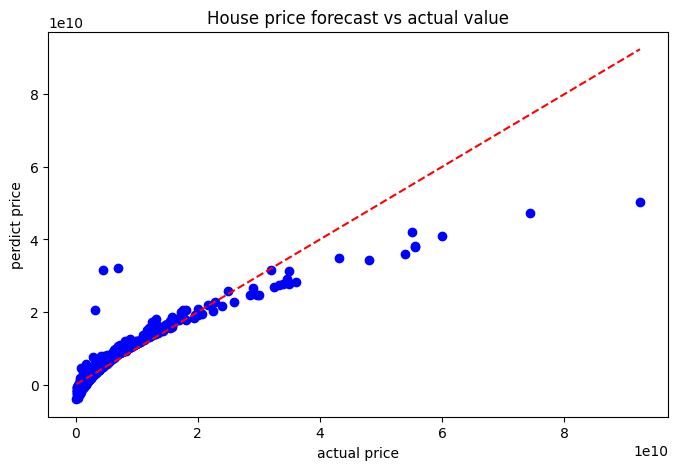

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
train_score =model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"(R2 score) in the training set is {train_score:0.2%} for model.")
print(f"(R2 score) in the testing set is {test_score:0.2%} for  model.")
# Perdict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
print("model R²:", r2)

# Predicted vs Actual graph
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('House price forecast vs actual value')
plt.xlabel('actual price')
plt.ylabel('perdict price')
plt.show()

In [80]:
model.score(X_train, y_train)

0.8294991603045285

In [81]:
model.score(X_test, y_test)

0.8509928029567334

RandomForest

In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


modell = RandomForestRegressor(n_estimators=100,random_state=42)
modell.fit(X_train, y_train)
y_pred = modell.predict(X_test)
train_score =modell.score(X_train, y_train)
test_score = modell.score(X_test, y_test)
print(f"(R2 score) in the training set is {train_score:0.2%} for model.")
print(f"(R2 score) in the testing set is {test_score:0.2%} for  model.")

print("R2 Score:", r2_score(y_test, y_pred))


(R2 score) in the training set is 99.59% for model.
(R2 score) in the testing set is 97.50% for  model.
R2 Score: 0.9750471090869537


In [83]:
from  sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

train_score =gb_model.score(X_train, y_train)
test_score = gb_model.score(X_test, y_test)
print(f"(R2 score) in the training set is {train_score:0.2%} for model.")
print(f"(R2 score) in the testing set is {test_score:0.2%} for  model.")
print("R2 Score Of GradiantBoosting :", r2)



(R2 score) in the training set is 99.79% for model.
(R2 score) in the testing set is 98.69% for  model.
R2 Score Of GradiantBoosting : 0.9869304817787409


In [84]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=200,learning_rate=0.1,max_depth=5,subsample=0.8,colsample_bytree=0.8,random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"(R2 score) in the training set is {train_score:0.2%} for model.")
print(f"(R2 score) in the testing set is {test_score:0.2%} for  model.")
print("R2 Score Of XGBRegressor :", r2_score(y_test, y_pred))

(R2 score) in the training set is 99.79% for model.
(R2 score) in the testing set is 98.69% for  model.
R2 Score Of XGBRegressor : 0.9720966928912632


           feature  importance
6  price_per_meter    0.305135
0             Area    0.218923
1             Room    0.214532
3        Warehouse    0.112136
5          Address    0.071347
4         Elevator    0.049530
2          Parking    0.028398


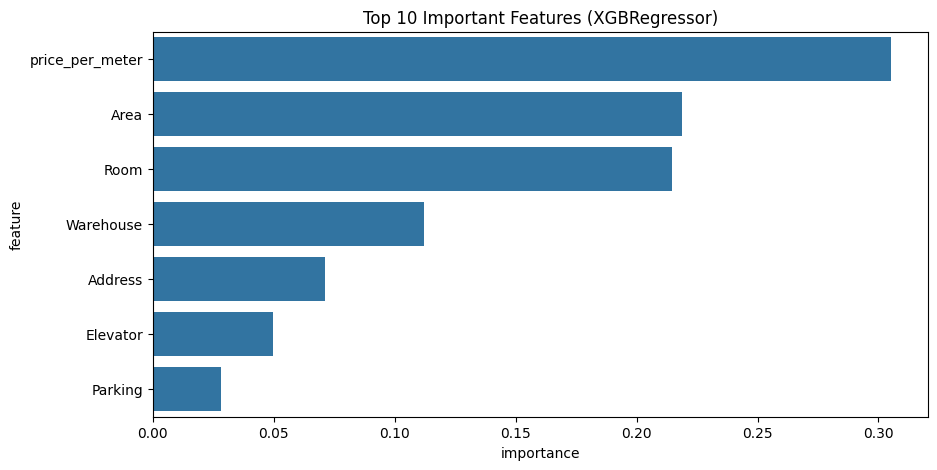

In [85]:
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importance.head(10))

plt.figure(figsize=(10,5))
sns.barplot(x='importance', y='feature', data=importance.head(10))
plt.title('Top 10 Important Features (XGBRegressor)')
plt.show()


In [86]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xgb_model, X_train, y_train.values.ravel(), cv=5, scoring='r2')
print("Cross Validation R2 scores:",cv_scores)
print("Average R2:", cv_scores.mean())
print("Std R2:", cv_scores.std())

Cross Validation R2 scores: [0.83958568 0.97513695 0.98478476 0.96620412 0.92605364]
Average R2: 0.9383530301367617
Std R2: 0.05327459044640693


In [87]:
models = {
    "Linear Regression": model,
    "Random Forest": modell,
    "Gradient Boosting": gb_model,
    "XGB Regressor": xgb_model
}

for name, m in models.items():
    print(f"{name} - Train R²: {m.score(X_train, y_train):.3f} | Test R²: {m.score(X_test, y_test):.3f}")


Linear Regression - Train R²: 0.829 | Test R²: 0.851
Random Forest - Train R²: 0.996 | Test R²: 0.975
Gradient Boosting - Train R²: 0.998 | Test R²: 0.987
XGB Regressor - Train R²: 0.999 | Test R²: 0.972


In [88]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,price_per_meter
0,63.0,1,1,1,1,156,1.850000e+09,2.936508e+07
1,60.0,1,1,1,1,156,1.850000e+09,3.083333e+07
2,79.0,2,1,1,1,117,5.500000e+08,6.962025e+06
3,95.0,2,1,1,1,152,9.025000e+08,9.500000e+06
4,123.0,2,1,1,1,150,7.000000e+09,5.691057e+07


In [89]:
import joblib
joblib.dump(xgb_model, "house_price_xgb_final.joblib")
joblib.dump(scaler, "scaler.joblib")
print(" Final XGBoost model and scaler saved successfully!")

 Final XGBoost model and scaler saved successfully!


In [90]:
joblib.dump(le, "address_encoder.joblib")

['address_encoder.joblib']

In [91]:
df. groupby('Address')['Price'].mean().sort_values(ascending=False)

Address
55     7.000000e+10
87     4.800000e+10
90     3.346667e+10
177    3.270000e+10
44     2.678635e+10
           ...     
66     5.100000e+08
53     4.700000e+08
121    3.400000e+08
133    3.275000e+08
92     2.500000e+08
Name: Price, Length: 192, dtype: float64